In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import numpy as np
import pandas as pd
import glob

In [39]:
def histoplot(df, dfvar, num_bins = 10, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()

    fig.tight_layout()
    plt.show()

In [40]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [41]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

In [42]:
def read_histograms(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    histograms = {}
    current_histogram = None
    bin_edges = []
    bin_values = []

    for line in lines:
        if line.startswith("# Histogram:"):
            if current_histogram:
                histograms[current_histogram] = (bin_edges, bin_values)
            current_histogram = line.split(":")[1].strip()
            bin_edges = []
            bin_values = []
        elif current_histogram and line.strip():
            parts = line.split()
            bin_edges.append(float(parts[0]))
            bin_edges.append(float(parts[1]))
            bin_values.append(float(parts[2]))
    
    if current_histogram:
        histograms[current_histogram] = (bin_edges, bin_values)

    return histograms


In [43]:
def plot_histogram(histograms, name, figsize=(6, 6)):
    edges, values = histograms[name]
    bin_edges = edges[::2]  # taking only the lower edges
    bin_width = edges[1] - edges[0]  # assuming uniform bin width
    
    plt.figure(figsize=figsize)    
    plt.bar(bin_edges, values, width=bin_width, align='edge')
    plt.title(f"Histogram: {name}")
    plt.xlabel("Bin")
    plt.ylabel("Count")
    plt.show()


In [44]:
def collect_images(df, n= 8):
    events = np.unique(df['event'])
    images = np.zeros((events.shape[0],n,n))
    gevt = df.groupby('event')
    i=0
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        for _, row in group.iterrows():
            sensor_id = row['sensor_id']
            charge = row['amplitude']
            charge_matrix[sensor_id // n, sensor_id % n] = charge
        images[i]= charge_matrix
        i+=1
    return images

## Sensor data
- Contains a vector of times and chage

In [54]:
df = pd.read_csv("sensor_data_2.csv", header=0)
df

,event,sensor_id,time,charge
0,70,6,0,356
1,70,6,1,10
2,70,26,0,698
3,70,26,1,15
4,70,26,2,1
...,...,...,...,...
14443,89,16,1,9
14444,89,34,0,433
14445,89,34,1,9
14446,89,3,0,368


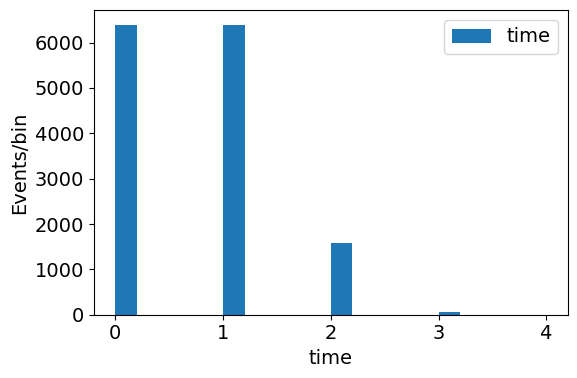

In [55]:
histoplot(df, "time", num_bins = 20, figsize=(6, 4), title="")

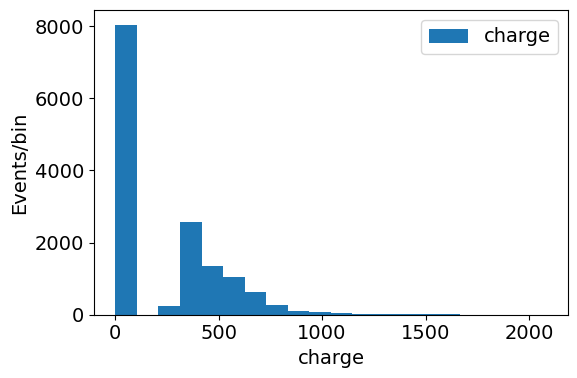

In [56]:
histoplot(df, "charge", num_bins = 20, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [57]:
df = pd.read_csv("integrated_sensor_data_2.csv", header=0)

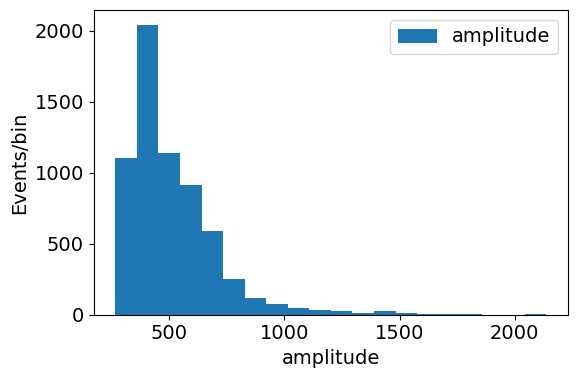

In [58]:
histoplot(df, "amplitude", num_bins = 20, figsize=(6, 4), title="")

## Plot control histograms

In [59]:
histograms = read_histograms("histograms_2.txt")

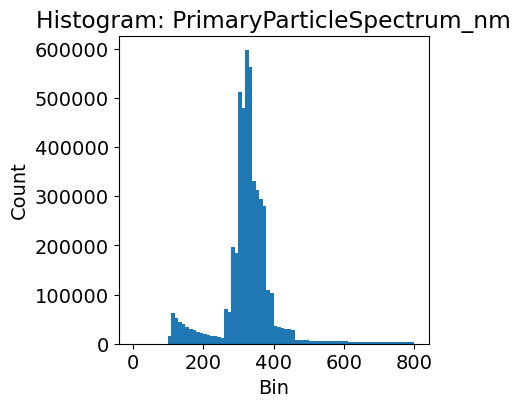

In [60]:
plot_histogram(histograms, "PrimaryParticleSpectrum_nm", figsize=(4, 4))

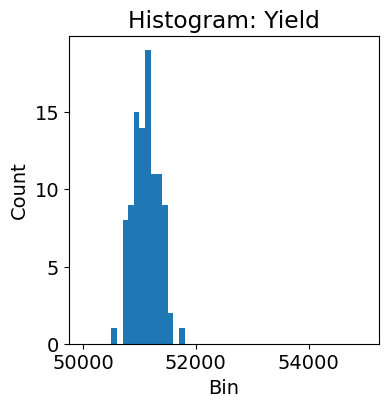

In [61]:
plot_histogram(histograms, "Yield", figsize=(4, 4))

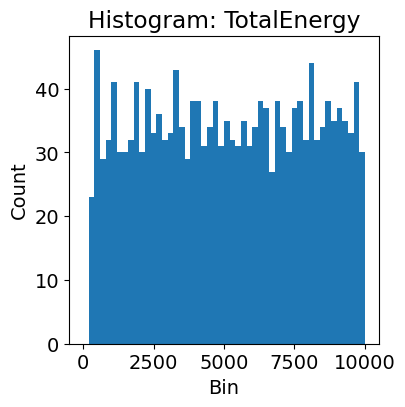

In [62]:
plot_histogram(histograms, "TotalEnergy", figsize=(4, 4))

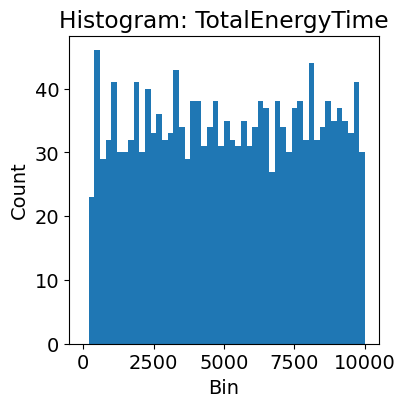

In [63]:
plot_histogram(histograms, "TotalEnergyTime", figsize=(4, 4))

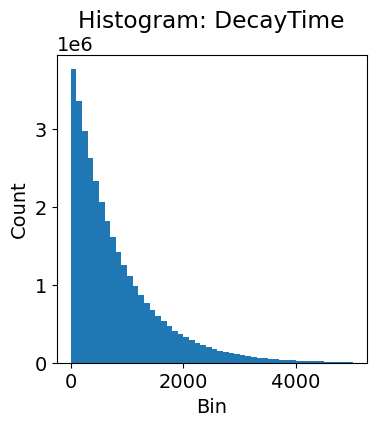

In [67]:
plot_histogram(histograms, "DecayTime", figsize=(4, 4))

### Plot a few events

In [68]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [69]:
charge_matrix

array([[319., 399., 345., 373., 383., 410., 347., 327.],
       [378., 410., 406., 441., 393., 390., 400., 366.],
       [394., 405., 479., 472., 475., 435., 428., 389.],
       [409., 504., 554., 536., 505., 454., 423., 389.],
       [568., 615., 697., 608., 605., 539., 469., 403.],
       [600., 692., 728., 770., 654., 574., 520., 407.],
       [595., 782., 844., 825., 710., 545., 504., 432.],
       [575., 715., 772., 785., 622., 511., 457., 362.]])

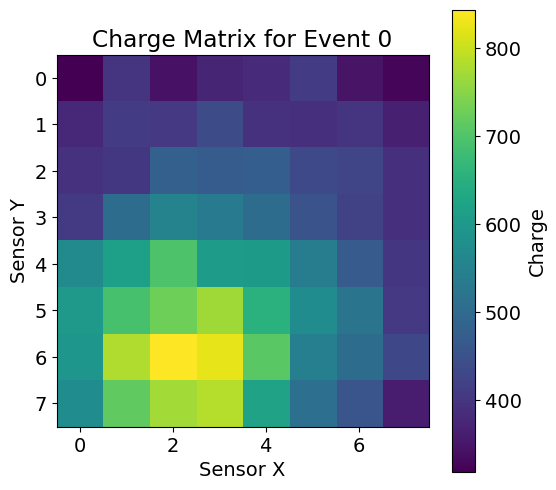

In [70]:
plot_image(charge_matrix)

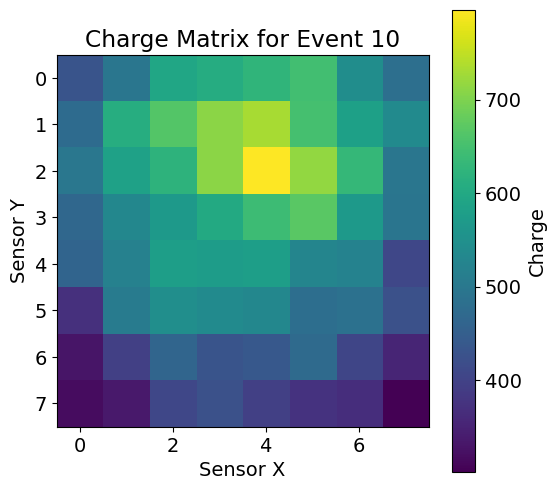

In [71]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

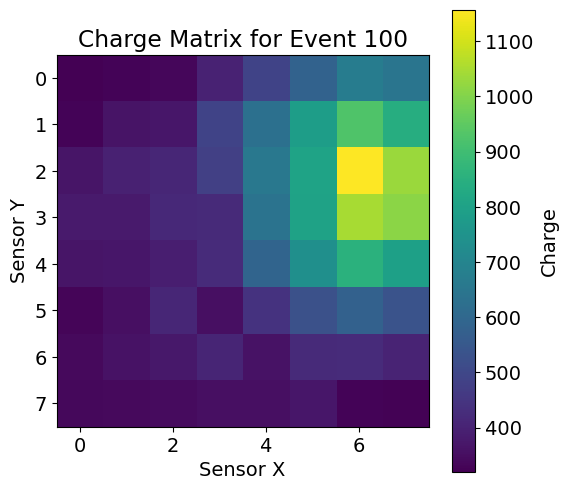

In [72]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

In [74]:
images = collect_images(df)

In [42]:
images.shape

(1000, 8, 8)

In [75]:
np.save('images_1.npy', images)

In [76]:
images = np.load('images_1.npy')

In [77]:
images.shape

(1000, 8, 8)

In [78]:
images

array([[[ 319.,  399.,  345., ...,  410.,  347.,  327.],
        [ 378.,  410.,  406., ...,  390.,  400.,  366.],
        [ 394.,  405.,  479., ...,  435.,  428.,  389.],
        ...,
        [ 600.,  692.,  728., ...,  574.,  520.,  407.],
        [ 595.,  782.,  844., ...,  545.,  504.,  432.],
        [ 575.,  715.,  772., ...,  511.,  457.,  362.]],

       [[ 618.,  653.,  633., ...,  394.,  347.,  349.],
        [ 729.,  817.,  770., ...,  515.,  444.,  400.],
        [ 748.,  802.,  782., ...,  471.,  387.,  403.],
        ...,
        [ 471.,  551.,  537., ...,  439.,  380.,  387.],
        [ 376.,  477.,  441., ...,  374.,  400.,  350.],
        [ 351.,  369.,  409., ...,  375.,  334.,  315.]],

       [[ 340.,  347.,  337., ...,  316.,  348.,  331.],
        [ 298.,  346.,  345., ...,  373.,  366.,  329.],
        [ 531.,  475.,  447., ...,  357.,  431.,  362.],
        ...,
        [1325., 1275.,  848., ...,  400.,  351.,  343.],
        [1073., 1041.,  795., ...,  397.,  38